# Data wrangling WeRateDogs

## by Han Kim

> Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it, which is called data wrangling.

# Project Overview
## Introduction

The dataset that I wrangled, analyzed, and visualized is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "[they're good dogs Brent](https://knowyourmeme.com/memes/theyre-good-dogs-brent)." WeRateDogs has over 8.7 million followers as of June 15, 2020 and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. 

## What Software Do I Need?

- The entirety of this project was completed in a Jupyter Notebook. 
- The following packages (libraries) need to be installed. You can install these packages via conda or pip. 
  - pandas
  - NumPy
  - requests
  - tweepy
  - json




## Table of Contents

[1. Gathering data](#gather)

[2. Assessing data](#assess)

[3. Cleaning data](#clean)

[4. Analyzing data](#storing)


<a id='gather'></a>
## 1. Gathering data

1. The WeRateDogs Twitter archive.  `twitter_archive_enhanced.csv` is uploaded in GitHub folder.

- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (`image_predictions.tsv`) is hosted on Udacity's servers and should be downloaded programmatically using the [Requests](https://pypi.org/project/requests/) library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's [Tweepy](http://www.tweepy.org/) library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

### WeRateDogs Twitter archive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy 
import json 

%matplotlib inline

In [2]:
# given by Udacity
tw_archive = pd.read_csv('twitter-archive-enhanced.csv') 
tw_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Tweet image predictions

In [3]:
#Hosted image_predictions.tsv on Udacity's servers to be downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)

with open('image-predictions.tsv', 'wb') as file:
    file.write(r.content)

image = pd.read_csv('image-predictions.tsv', sep='\t' )
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Query the Twitter API for each tweet's JSON data using Python's Tweepy library

In [4]:
# tweepy library uses tweepy.get_status()
'''
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
'''

'\nconsumer_key = \nconsumer_secret = \naccess_token = \naccess_secret = \n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)\n'

In [5]:
'''
import os
avail_tweet = []
notavail_tweet = []
# using tweet IDs
with open('tweet_json.txt','w') as outfile:
    for i in tw_archive['tweet_id']:
        try:
            # query Tweetter API
            tweet = api.get_status(i)
            avail_tweet.append(tweet)
            #json.dump(tweet._json, outfile)
            outfile.write(json.dumps(my_list_of_dicts, indent=4))
            outfile.write("\n")
            print(i)

        
        except:
            #e = os.sys.exc_info()[0]
            notavail_tweet.append(i)
'''      

'\nimport os\navail_tweet = []\nnotavail_tweet = []\n# using tweet IDs\nwith open(\'tweet_json.txt\',\'w\') as outfile:\n    for i in tw_archive[\'tweet_id\']:\n        try:\n            # query Tweetter API\n            tweet = api.get_status(i)\n            avail_tweet.append(tweet)\n            #json.dump(tweet._json, outfile)\n            outfile.write(json.dumps(my_list_of_dicts, indent=4))\n            outfile.write("\n")\n            print(i)\n\n        \n        except:\n            #e = os.sys.exc_info()[0]\n            notavail_tweet.append(i)\n'

In [6]:
data_list = []
with open('tweet_json.txt', 'r') as r: 
    #json_tweet = r.readline()
    data = json.load(r)
    for i in data:
    #while json_tweet:
        tweet_id = i['id']
        #dic = json.loads(json_tweet)
        #data_row = dict((i, dic[i]) for i in elements)
        #data.append(data_row)
        #json_tweet = r.readline()
        favorite_count = i['favorite_count']
        retweet_count = i['retweet_count']
        followers_count = i['user']['followers_count']
        friends_count = i['user']['friends_count']
        retweeted_status = i['retweeted_status'] = i.get('retweeted_status', 'Original tweet')
        tweet_text = i['text']
        url_only = tweet_text[tweet_text.find('https'):]
        if retweeted_status == 'Original tweet':
            url = url_only
        else:
            retweeted_status = 'retweet'
            url = '-'              
        data_list.append({'tweet_id': str(tweet_id),
                          'favorite_count': int(favorite_count),
                          'retweet_count': int(retweet_count),
                          'followers_count': int(followers_count),
                          'friends_count': int(friends_count),
                          'url': url,
                          'retweeted_status': retweeted_status,
                         })
        data_column = ['tweet_id', 'favorite_count','retweet_count','followers_count', 'friends_count', 'retweeted_status', 'url']
        tw_json = pd.DataFrame(data_list, columns = data_column)

In [7]:
tw_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,retweeted_status,url
0,892420643555336193,35934,7632,8795165,17,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,31013,5643,8795165,17,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23331,3740,8795165,17,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39232,7804,8795165,17,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37473,8397,8795165,17,Original tweet,https://t.co/0g0KMIVXZ3


In [8]:
tw_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 7 columns):
tweet_id            2329 non-null object
favorite_count      2329 non-null int64
retweet_count       2329 non-null int64
followers_count     2329 non-null int64
friends_count       2329 non-null int64
retweeted_status    2329 non-null object
url                 2329 non-null object
dtypes: int64(4), object(3)
memory usage: 127.4+ KB


<a id='assess'></a>
## Assessing data

> In this section, the gathered data will be assessed visually and programmatically for quality and tidiness issues.

### Visual assessment


In [9]:
tw_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [10]:
image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [11]:
tw_json.head(2)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,retweeted_status,url
0,892420643555336193,35934,7632,8795165,17,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,31013,5643,8795165,17,Original tweet,https://t.co/aQFSeaCu9L


### Programmatic assessment



In [12]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
tw_archive.name.value_counts().describe()

count    957.000000
mean       2.461860
std       24.129789
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      745.000000
Name: name, dtype: float64

([<matplotlib.axis.XTick at 0x207bad366a0>],
 <a list of 1 Text xticklabel objects>)

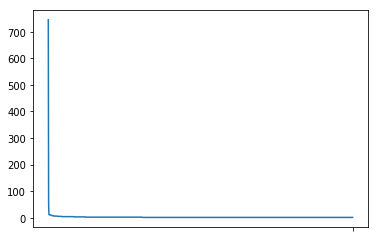

In [14]:
plt.plot(tw_archive.name.value_counts());
plt.xticks("")

In [15]:
# the number of tweet_id duplicated
sum(tw_archive['tweet_id'].duplicated())

0

Text(0, 0.5, 'count')

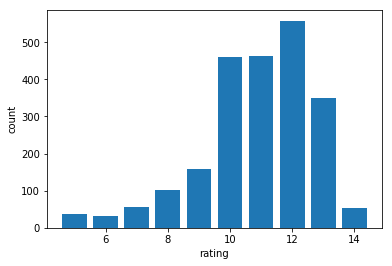

In [16]:
# TOP 10 rating numerator
plt.bar(tw_archive.rating_numerator.value_counts().head(10).index, tw_archive.rating_numerator.value_counts().head(10))
plt.xlabel('rating')
plt.ylabel('count')

In [17]:
tw_archive.rating_denominator.value_counts().head(10)

10    2333
11       3
50       3
80       2
20       2
2        1
16       1
40       1
70       1
15       1
Name: rating_denominator, dtype: int64

> These ratings almost always have a denominator of 10 

In [18]:
image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1514,786664955043049472,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,True,keeshond,0.464816,True,Pomeranian,0.007812,True
304,671518598289059840,https://pbs.twimg.com/media/CVG2l9jUYAAwg-w.jpg,1,Lakeland_terrier,0.428275,True,wire-haired_fox_terrier,0.111472,True,toy_poodle,0.105016,True
1497,783466772167098368,https://pbs.twimg.com/media/Ct9u3ljW8AEnVIm.jpg,1,Chihuahua,0.789000,True,miniature_pinscher,0.115916,True,toy_terrier,0.036294,True
812,692530551048294401,https://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg,1,Siberian_husky,0.486428,True,Eskimo_dog,0.448518,True,white_wolf,0.041506,False
1711,818536468981415936,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,1,swing,0.999403,False,Welsh_springer_spaniel,0.000062,True,bow,0.000030,False
857,696877980375769088,https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg,1,space_heater,0.206876,False,spatula,0.123450,False,vacuum,0.119218,False
1713,818614493328580609,https://pbs.twimg.com/media/C1xNgraVIAA3EVb.jpg,4,Chihuahua,0.450722,True,Border_terrier,0.204177,True,beagle,0.092774,True
363,672877615439593473,https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg,1,Chihuahua,0.412362,True,beagle,0.068066,True,borzoi,0.045071,True
265,670803562457407488,https://pbs.twimg.com/media/CU8sSAvXIAAB1Py.jpg,1,basenji,0.344101,True,Ibizan_hound,0.210282,True,toy_terrier,0.196279,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [19]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# the number of the duplcated image url
sum(image.jpg_url.duplicated())

66

In [21]:
# a list of all the duplicate jpg_url items 
urls = image["jpg_url"]
image[urls.isin(urls[urls.duplicated()])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False


In [22]:
print(image.p1_dog.value_counts())
print(image.p2_dog.value_counts())
print(image.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [23]:
image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [24]:
tw_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,retweeted_status,url
346,829861396166877184,12240,1938,8795169,17,Original tweet,https://t.co/xeudgDXmTU
1480,691793053716221953,8053,4166,8795216,17,Original tweet,https://t.co/qnMJHBxPuo
700,783466772167098368,8543,2272,8795174,17,Original tweet,https://t.co/UAw6F2p7ta
1601,684800227459624960,2710,989,8795220,17,Original tweet,https://t.co/J3Ld4fRbSy
1904,674036086168010753,821,196,8795264,17,Original tweet,https://t.co/jcNdw43BIP
2300,666407126856765440,99,32,8795269,17,Original tweet,https://t.co/LopTBkKa8h
397,822872901745569793,132177,43423,8795170,17,Original tweet,https://t.co/nTz3FtorBc
1595,684940049151070208,3182,1035,8795220,17,Original tweet,https://t.co/zNeLxJeAoL
1707,679777920601223168,3054,1081,8795223,17,Original tweet,https://t.co/PA0czwucsb
760,775842724423557120,11769,2669,8795174,17,Original tweet,https://t.co/saRYTcxQeH


In [25]:
tw_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 7 columns):
tweet_id            2329 non-null object
favorite_count      2329 non-null int64
retweet_count       2329 non-null int64
followers_count     2329 non-null int64
friends_count       2329 non-null int64
retweeted_status    2329 non-null object
url                 2329 non-null object
dtypes: int64(4), object(3)
memory usage: 127.4+ KB


In [26]:
tw_json.retweeted_status.value_counts()

Original tweet    2166
retweet            163
Name: retweeted_status, dtype: int64

<a id='quality'></a>
### Quality


1. tw_archive - keep original ratings
- tw_archive: Correct numerators 
- tw_archive: Correct denominators
- image: Drop jpg_url duplicated ones
- image: breed predictions 
- image and tw_archive: Delete useless columns 
- tw_archive: Correct dog name by removing which is not
- tw_json: Keep original tweets only


<a id='tidiness'></a>
### Tidiness 



1. tw_archive: remove dataset having multiple dog stages
- tw_archive: Merge dogs stages 
- Change datatype for a merge 
- Merge tw_archive_clean, image_clean, and tw_json_clean dataframes.


<a id='clean'></a>
## Cleaning Data


## Quality

In [27]:
tw_archive_clean = tw_archive.copy()
image_clean = image.copy()
tw_json_clean = tw_json.copy()

In [28]:
tw_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1. tw_archive - keep original ratings 


#### Define
> there are unique 181 values in retweeted_status_id and retweeted_status_user_id, so keep the original ratings by deleting the retweets. 

In [29]:
tw_archive_clean.retweeted_status_id.value_counts().sum(), tw_archive_clean.retweeted_status_user_id.value_counts().sum()

(181, 181)

#### Code

In [30]:
tw_archive_clean = tw_archive_clean[pd.isnull(tw_archive_clean.retweeted_status_id)]



#### Test

In [31]:
# check rows which have null value on retweeted_status_user_id column delected
print(sum(tw_archive_clean.retweeted_status_user_id.value_counts()))

0


### 2 & 3. tw_archive: Correct numerators and denominators

#### Define

In [32]:


tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Code

In [33]:
# denominators
tw_archive_clean[['rating_numerator', 'rating_denominator']] = tw_archive_clean[['rating_numerator','rating_denominator']].astype(float)


tw_archive_clean.loc[(tw_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
tw_archive_clean.loc[(tw_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
tw_archive_clean.loc[(tw_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
tw_archive_clean.loc[(tw_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
tw_archive_clean.loc[(tw_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26




In [34]:
tw_archive_clean = tw_archive_clean[tw_archive_clean.rating_numerator< 20]

In [35]:
#numerators
tw_archive_clean['rating'] = 10 * tw_archive_clean['rating_numerator'] / tw_archive_clean['rating_denominator'].astype(float)



#### Test

In [36]:
with pd.option_context('max_colwidth', 200):
    display(tw_archive_clean[tw_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\altai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [37]:

tw_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
115,870374049280663552,NaN,NaN,2017-06-01 20:18:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870374049...,13.0,10.0,Zoey,None,None,None,None,13.0
1343,704761120771465216,NaN,NaN,2016-03-01 20:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper killed this great white in an epic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704761120...,13.0,10.0,None,None,None,pupper,None,13.0
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12.0,10.0,Coco,None,None,None,None,12.0
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4.0,20.0,None,None,None,None,None,2.0
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13.0,10.0,None,None,None,None,None,13.0


### 4. image: Drop jpg_url duplicated ones

#### Define
> drop the duplicated ones on the jpg_url column

#### Code

In [38]:
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [39]:
sum(image_clean['jpg_url'].duplicated())

0

### 5. image: breed predictions 

#### Define
> drop the duplicated ones on the jpg_url column

#### Code

In [40]:

breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

image_clean.apply(breed_conf, axis = 1)

image_clean['breed'] = breed
image_clean['confidence'] = conf

In [41]:
tw_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,retweeted_status,url
0,892420643555336193,35934,7632,8795165,17,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,31013,5643,8795165,17,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23331,3740,8795165,17,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39232,7804,8795165,17,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37473,8397,8795165,17,Original tweet,https://t.co/0g0KMIVXZ3


#### Test

In [42]:
sum(image_clean['jpg_url'].duplicated())

0

### 6-1. image: Delete useless columns 

#### Define

In [43]:
#print list of image_prediction columns
print(list(image_clean))

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'breed', 'confidence']


#### Code

In [44]:
image_clean.columns[2:-2]

Index(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [45]:
image_clean = image_clean.drop(image_clean.columns[2:-2], 1)

#### Test

In [46]:
list(image_clean)

['tweet_id', 'jpg_url', 'breed', 'confidence']

### 6-2. tw_archive: Delete useless columns 

#### Define

In [47]:
#print list of image_prediction columns
print(list(tw_archive_clean))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'rating']


#### Code

In [48]:
tw_archive_clean.columns[6:10]

Index(['retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls'],
      dtype='object')

In [49]:
tw_archive_clean = tw_archive_clean.drop(tw_archive_clean.columns[6:10], 1)

#### Test

In [50]:
list(tw_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating']

### 7. tw_archive: Correct dog name by removing which is not

#### Define

> There are several values that are not dog names, like 'a', 'the', 'such', etc.

#### Code

In [51]:
tw_archive_clean['name'].value_counts().head(10)

None       664
a           54
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Sadie        8
Winston      8
Name: name, dtype: int64

In [52]:
# This is the list of name which starts with a lowercase, which might not be a name
tw_archive_clean['name'][tw_archive_clean['name'].str.islower() == True].value_counts()


a               54
the              8
an               6
very             4
one              4
quite            3
just             3
actually         2
not              2
getting          2
mad              1
all              1
life             1
unacceptable     1
officially       1
his              1
light            1
by               1
incredibly       1
such             1
my               1
space            1
old              1
infuriating      1
Name: name, dtype: int64

In [53]:
tw_archive_clean['name'][tw_archive_clean['name'].str.islower() == True] = 'None'

C:\Users\altai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [54]:
tw_archive_clean['name'].value_counts()

None         766
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Sadie          8
Lola           8
Winston        8
Daisy          7
Toby           7
Stanley        6
Oscar          6
Bailey         6
Bella          6
Bo             6
Jax            6
Koda           6
Rusty          5
Bentley        5
Dave           5
Buddy          5
Chester        5
Scout          5
Leo            5
Louis          5
Milo           5
Boomer         4
Larry          4
            ... 
Rizzy          1
Luther         1
Bobble         1
Gert           1
Fizz           1
Jomathan       1
Colin          1
Dixie          1
Ulysses        1
Winifred       1
Trevith        1
Eugene         1
Lucia          1
Julio          1
Malikai        1
Sojourner      1
Ace            1
Chaz           1
Tom            1
Anthony        1
Baloo          1
Dido           1
Kellogg        1
Willem         1
Darby          1
Boston         1
Biden          1
Coleman       

In [55]:
tw_json_clean['retweeted_status'].value_counts()

Original tweet    2166
retweet            163
Name: retweeted_status, dtype: int64

### 8. tw_json: Keep original tweets only

#### Define

> keep original tweets only 

#### Code

In [56]:
tw_json_clean = tw_json_clean[tw_json_clean['retweeted_status'] == 'Original tweet']

#### Test

In [57]:
tw_json_clean['retweeted_status'].value_counts()

Original tweet    2166
Name: retweeted_status, dtype: int64


## Tidiness

### 1. tw_archive: remove dataset having multiple dog stages



In [58]:
tw_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1810
1,None,None,None,puppo,24
2,None,None,pupper,None,224
3,None,floofer,None,None,9
4,doggo,None,None,None,75
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,10
7,doggo,floofer,None,None,1


In [59]:
tw_archive_clean.drop(tw_archive_clean[(tw_archive_clean.doggo == 'doggo') & (tw_archive_clean.floofer == 'floofer')].index, inplace=True)
tw_archive_clean.drop(tw_archive_clean[(tw_archive_clean.doggo == 'doggo') & (tw_archive_clean.pupper == 'pupper')].index, inplace=True)
tw_archive_clean.drop(tw_archive_clean[(tw_archive_clean.doggo == 'doggo') & (tw_archive_clean.puppo == 'puppo')].index, inplace=True)

In [60]:
tw_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1810
1,None,None,None,puppo,24
2,None,None,pupper,None,224
3,None,floofer,None,None,9
4,doggo,None,None,None,75


### 2. tw_archive: Merge dogs stages to a single column with the dog type to be found from text column



#### Define
> Find a dog type from text column and put the dog type a new column. 

In [61]:

tw_archive_clean.iloc[:,-5:-1].apply(pd.value_counts)

,doggo,floofer,pupper,puppo
None,2067.0,2133.0,1918.0,2118.0
doggo,75.0,NaN,NaN,NaN
floofer,NaN,9.0,NaN,NaN
pupper,NaN,NaN,224.0,NaN
puppo,NaN,NaN,NaN,24.0


#### Code

In [62]:


dogs = ['pupper', 'puppo', 'doggo', 'floof']
dog_type = []
for row in tw_archive_clean['text']:
    row = row.lower()
    for word in dogs:
        if word in str(row):
            dog_type.append(dogs[dogs.index(word)])
            break
    else:
        dog_type.append('None')

tw_archive_clean['dog_type'] = dog_type

In [63]:
tw_archive_clean['dog_type'].value_counts()

None      1751
pupper     243
doggo       81
floof       35
puppo       32
Name: dog_type, dtype: int64

In [64]:
tw_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)




#### Test

In [65]:

tw_archive_clean[tw_archive_clean.dog_type!='None'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,dog_type
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,14.0,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,13.0,10.0,None,13.0,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,13.0,10.0,Stuart,13.0,puppo
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,12.0,10.0,None,12.0,floof
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,12.0,10.0,Roscoe,12.0,pupper


### 3 & 4 . Change datatype and merge with the other tables

#### Define 

> Change datatype to merge with the other tables

#### Code

In [66]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2142 non-null int64
in_reply_to_status_id    71 non-null float64
in_reply_to_user_id      71 non-null float64
timestamp                2142 non-null object
source                   2142 non-null object
text                     2142 non-null object
rating_numerator         2142 non-null float64
rating_denominator       2142 non-null float64
name                     2142 non-null object
rating                   2142 non-null float64
dog_type                 2142 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 200.8+ KB


In [67]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2009 non-null int64
jpg_url       2009 non-null object
breed         2009 non-null object
confidence    2009 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 78.5+ KB


In [68]:
tw_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2328
Data columns (total 7 columns):
tweet_id            2166 non-null object
favorite_count      2166 non-null int64
retweet_count       2166 non-null int64
followers_count     2166 non-null int64
friends_count       2166 non-null int64
retweeted_status    2166 non-null object
url                 2166 non-null object
dtypes: int64(4), object(3)
memory usage: 135.4+ KB


In [69]:
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)
tw_archive_clean['tweet_id'] = tw_archive_clean['tweet_id'].astype(str)

#### Test

In [70]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2009 non-null object
jpg_url       2009 non-null object
breed         2009 non-null object
confidence    2009 non-null float64
dtypes: float64(1), object(3)
memory usage: 78.5+ KB


In [71]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2142 non-null object
in_reply_to_status_id    71 non-null float64
in_reply_to_user_id      71 non-null float64
timestamp                2142 non-null object
source                   2142 non-null object
text                     2142 non-null object
rating_numerator         2142 non-null float64
rating_denominator       2142 non-null float64
name                     2142 non-null object
rating                   2142 non-null float64
dog_type                 2142 non-null object
dtypes: float64(5), object(6)
memory usage: 200.8+ KB


> Change the tweet_id column to datatype of int64 to make the dataframe merge with the other tables

In [72]:
df_master = pd.merge(tw_archive_clean, image_clean, on ='tweet_id', how= 'inner' )
df_master = pd.merge(df_master, tw_json_clean, on = 'tweet_id', how = 'inner' )

#### Test

In [73]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, 0 to 1894
Data columns (total 20 columns):
tweet_id                 1895 non-null object
in_reply_to_status_id    21 non-null float64
in_reply_to_user_id      21 non-null float64
timestamp                1895 non-null object
source                   1895 non-null object
text                     1895 non-null object
rating_numerator         1895 non-null float64
rating_denominator       1895 non-null float64
name                     1895 non-null object
rating                   1895 non-null float64
dog_type                 1895 non-null object
jpg_url                  1895 non-null object
breed                    1895 non-null object
confidence               1895 non-null float64
favorite_count           1895 non-null int64
retweet_count            1895 non-null int64
followers_count          1895 non-null int64
friends_count            1895 non-null int64
retweeted_status         1895 non-null object
url                  

<a id='storing'></a>
## Storing, Analyzing, and Visualizing Data

In [74]:

df_master.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [75]:
df_dog_type_mean = df_master.groupby('dog_type').mean()
df_dog_type_mean

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,rating,confidence,favorite_count,retweet_count,followers_count,friends_count
dog_type,,,,,,,,,,
None,6.978105e+17,4.196984e+09,10.375241,10.002569,10.375591,0.455919,7282.248555,2052.414258,8.795225e+06,17.0
doggo,NaN,NaN,11.714286,10.000000,11.714286,0.413229,16346.746032,5552.095238,8.795182e+06,17.0
floof,NaN,NaN,11.687500,10.000000,11.687500,0.653837,8007.437500,2440.593750,8.795199e+06,17.0
pupper,6.869622e+17,4.196984e+09,10.564654,10.000000,10.564654,0.470304,6275.682028,1935.718894,8.795230e+06,17.0
puppo,NaN,NaN,12.115385,10.000000,12.115385,0.627066,20851.269231,5574.115385,8.795178e+06,17.0


### Insight I


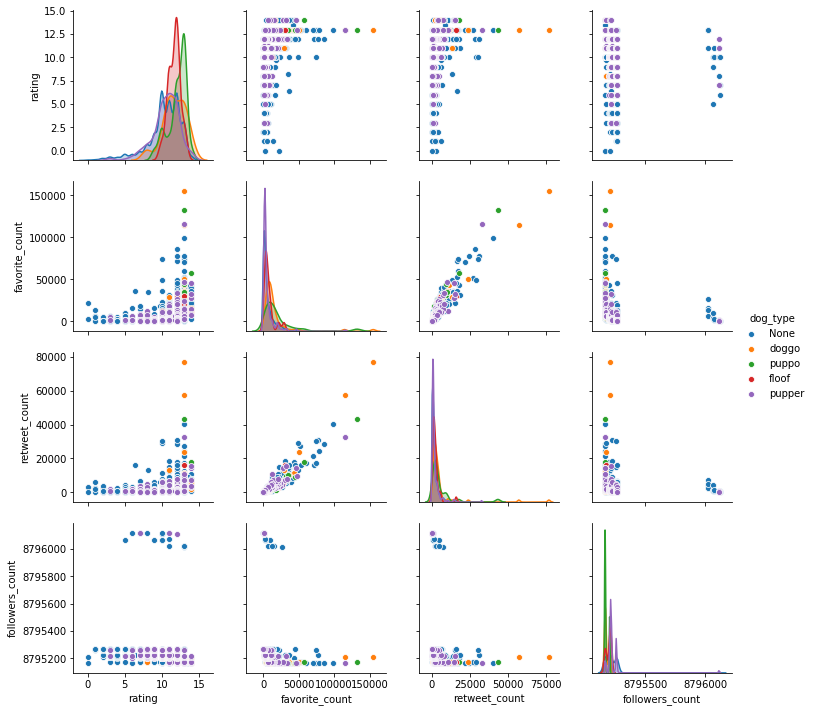

In [76]:
import seaborn as sb

sb.pairplot(df_master, vars = ['rating','favorite_count','retweet_count','followers_count'], hue='dog_type');
plt.savefig('1.png')

C:\Users\altai\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


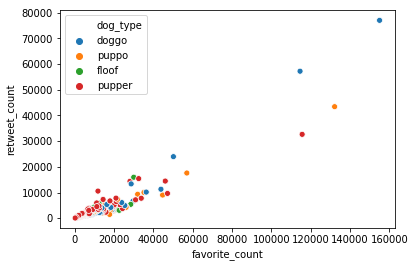

In [77]:
sb.scatterplot(data=df_master[df_master!='None'], x='favorite_count',y='retweet_count', hue='dog_type')

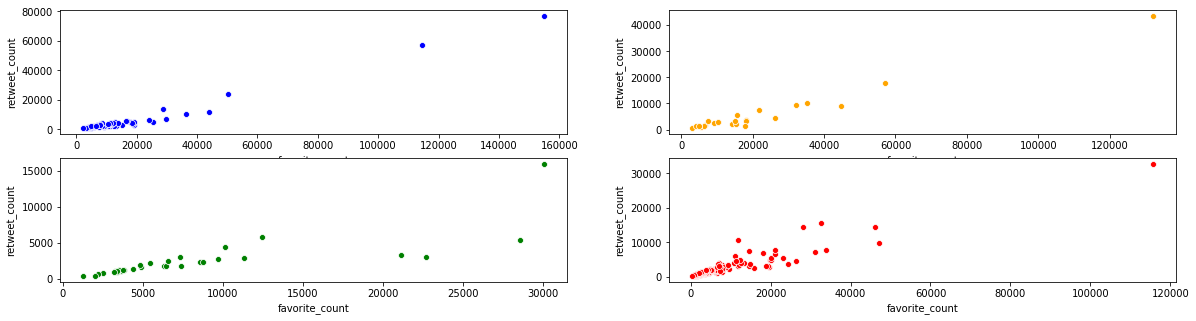

In [78]:
plt.figure(figsize = [20, 5])
plt.subplot(2,2,1)
sb.scatterplot(data=df_master[df_master.dog_type=='doggo'], x='favorite_count',y='retweet_count', color='blue')

plt.subplot(2,2,2)
sb.scatterplot(data=df_master[df_master.dog_type=='puppo'], x='favorite_count',y='retweet_count', color='orange')

plt.subplot(2,2,3)
sb.scatterplot(data=df_master[df_master.dog_type=='floof'], x='favorite_count',y='retweet_count', color='green')

plt.subplot(2,2,4)
sb.scatterplot(data=df_master[df_master.dog_type=='pupper'], x='favorite_count',y='retweet_count', color='red')

plt.savefig('2.png')

> From the pairplots, the positive strong relationship between retweet_count and favorite_count was observed, which was assumed that there are lots of people who can retweet whatever they liked, expressing.

### Insight II


In [79]:
# top 10 highest posted breeds 
df_master.groupby('breed')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Afghan_hound,2.0,8.000000,7.071068,3.0,5.50,8.00,10.50,13.0
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.50,11.25,12.0
American_Staffordshire_terrier,15.0,10.133333,3.090693,0.0,10.00,11.00,11.50,13.0
Appenzeller,2.0,11.000000,2.828427,9.0,10.00,11.00,12.00,13.0
Australian_terrier,2.0,11.500000,2.121320,10.0,10.75,11.50,12.25,13.0
Bedlington_terrier,6.0,10.333333,3.141125,6.0,8.25,10.50,12.75,14.0
Bernese_mountain_dog,11.0,11.272727,1.103713,10.0,10.00,12.00,12.00,13.0
Blenheim_spaniel,10.0,11.100000,1.100505,9.0,10.25,11.50,12.00,12.0
Border_collie,12.0,10.583333,2.503028,4.0,9.75,11.50,12.00,13.0


In [80]:
breed=df_master.groupby('breed')['rating'].count().sort_values(ascending=False)[1:11]
breed.index

Index(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'toy_poodle', 'chow', 'Pomeranian', 'Samoyed', 'malamute'],
      dtype='object', name='breed')

In [81]:
df_breed = df_master[0:0]
df_breed

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,dog_type,jpg_url,breed,confidence,favorite_count,retweet_count,followers_count,friends_count,retweeted_status,url


In [82]:
for i in breed.index:
    new=df_master[df_master.breed == i]
    df_breed = pd.concat([df_breed, new])

In [83]:
breed.index

Index(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'toy_poodle', 'chow', 'Pomeranian', 'Samoyed', 'malamute'],
      dtype='object', name='breed')

Text(0, 0.5, 'Ave. rating')

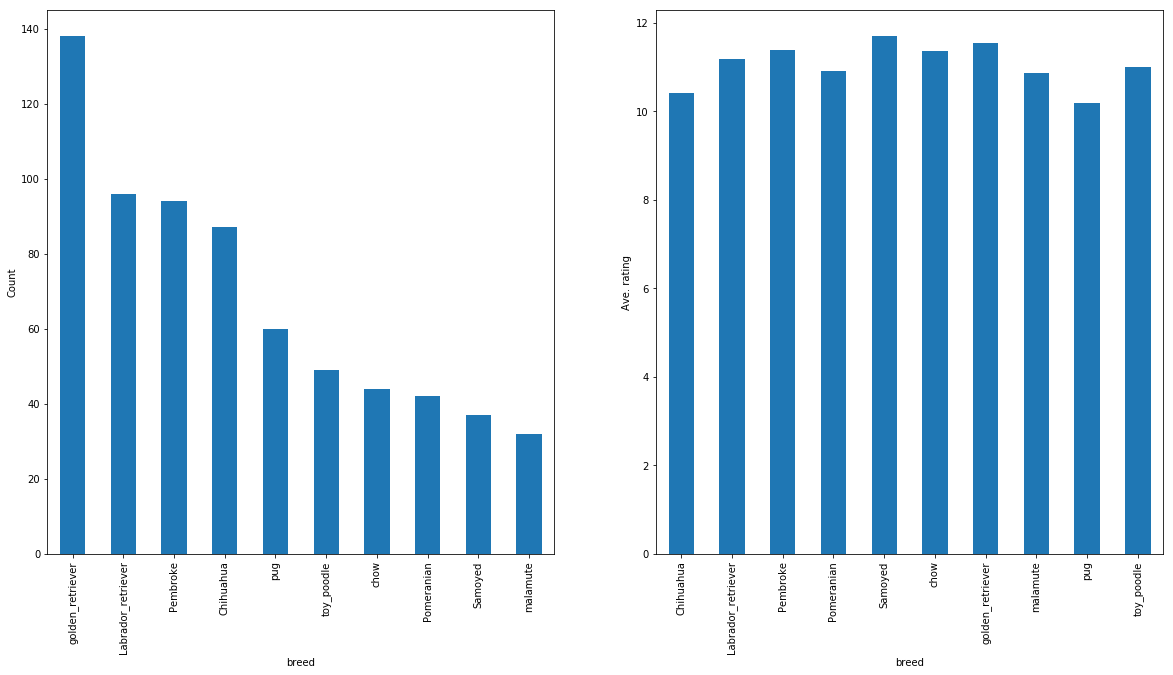

In [84]:
plt.figure(figsize = [20, 10])
plt.subplot(1, 2, 1)
breed.plot.bar()
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df_breed.groupby('breed')['rating'].mean().plot.bar()
plt.ylabel('Ave. rating')


> Two above bar plots are generated with only the top 10 highest count breeds. The left side plot is based on the number of breeds in the dataset while the right side plot is showing the average rating each breed. The list of the top 10 highest count breeds is not the same as the list of the top 10 highest average ratings of dog breeds. 

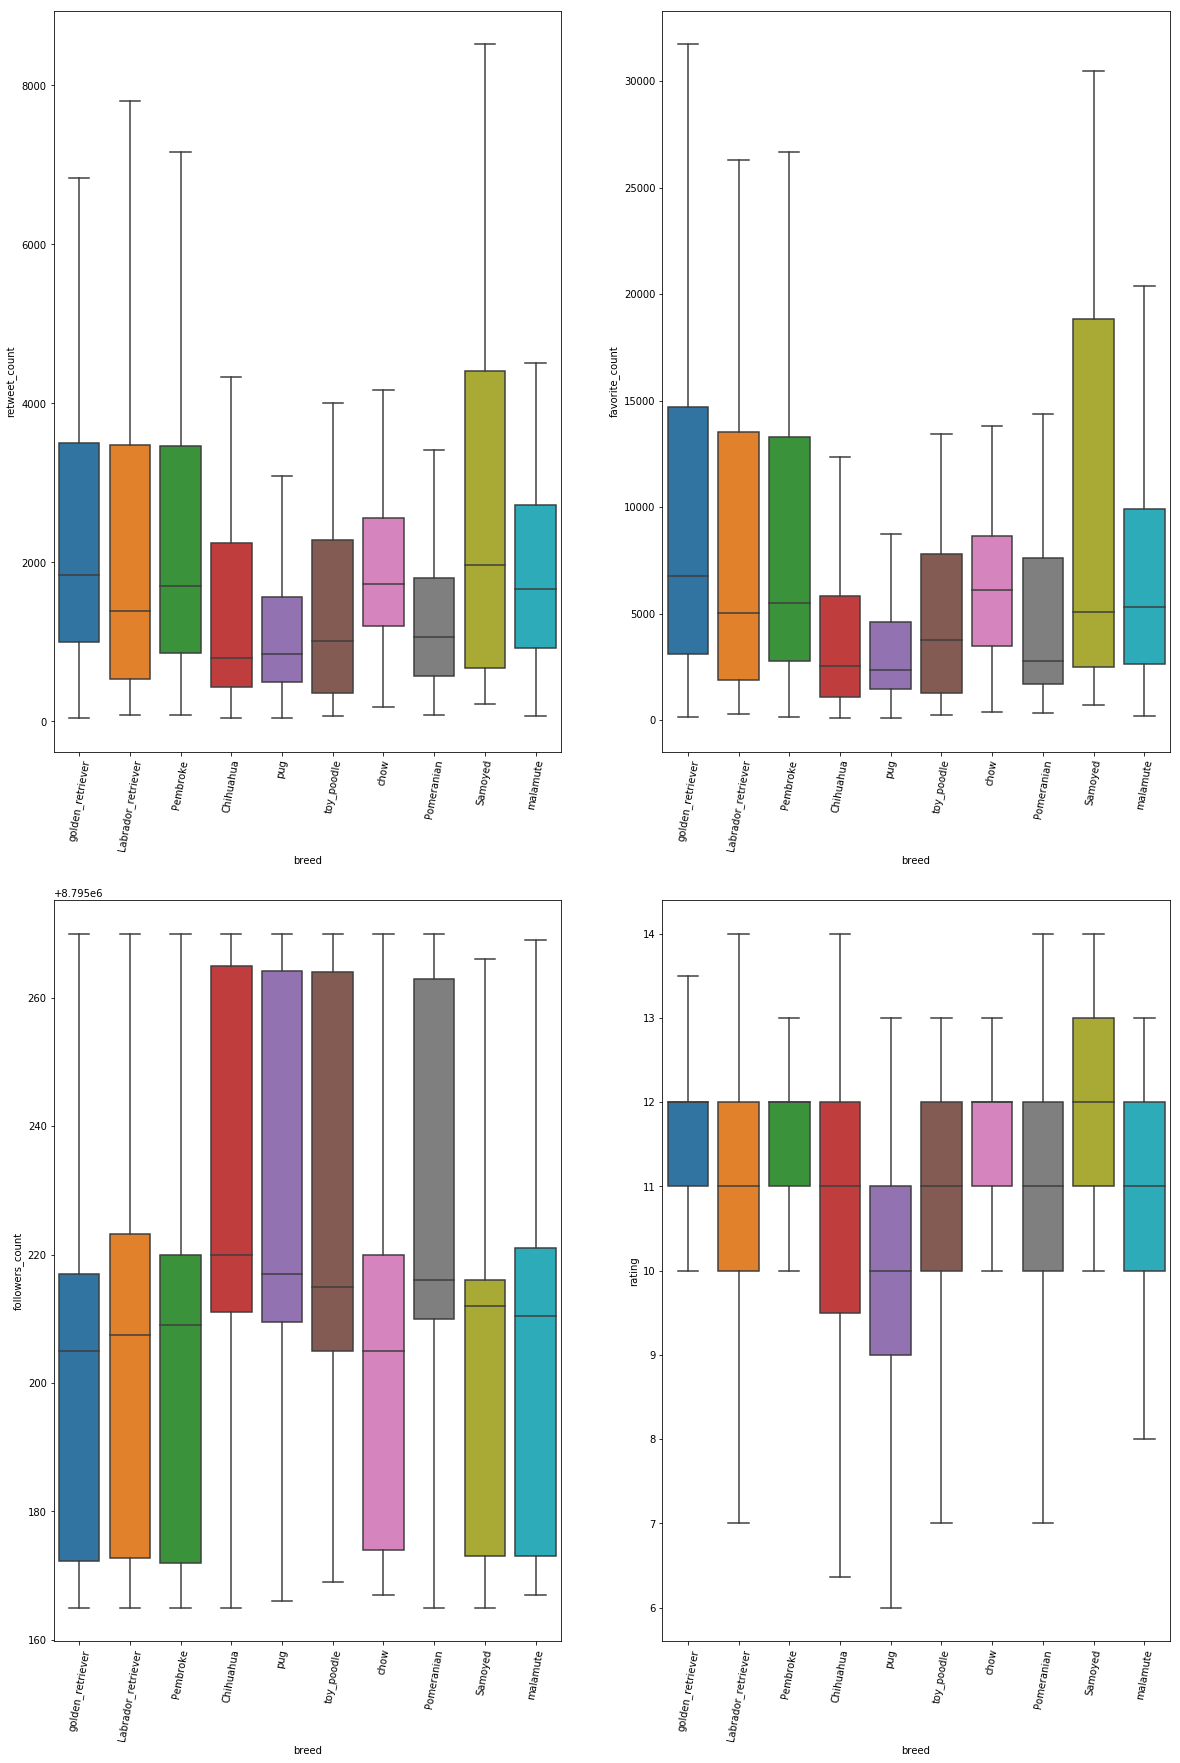

In [85]:



plt.figure(figsize = [20, 30])
plt.subplot(2,2,1)
sb.boxplot(data=df_breed, x='breed',y='retweet_count',showfliers=False)
plt.xticks(rotation=80)

plt.subplot(2,2,2)
sb.boxplot(data=df_breed, x='breed',y='favorite_count',showfliers=False)
plt.xticks(rotation=80)

plt.subplot(2,2,3)
sb.boxplot(data=df_breed, x='breed',y='followers_count',showfliers=False)
plt.xticks(rotation=80)

plt.subplot(2,2,4)
sb.boxplot(data=df_breed, x='breed',y='rating',showfliers=False)
plt.xticks(rotation=80)

plt.savefig('3.png')

> The four different box plots show that even the top 10 highest number of dog breeds posted in the tweet dataset is not equal to the ones of follower count, retweet count, and favorite count. They have different characteristics on each variable.

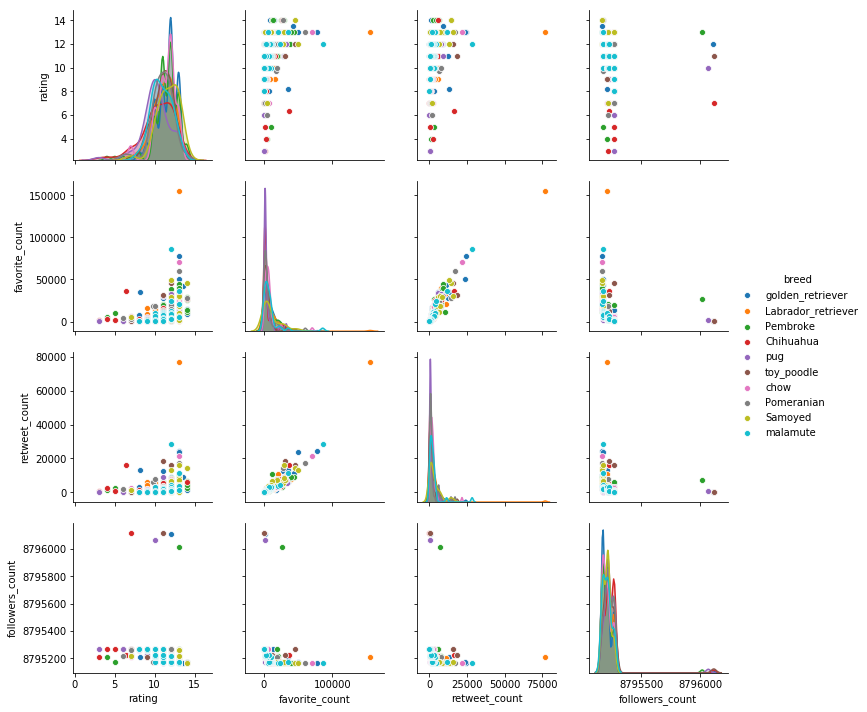

In [86]:
sb.pairplot(df_breed, vars = ['rating','favorite_count','retweet_count','followers_count'], hue='breed');


### Insight III 
 

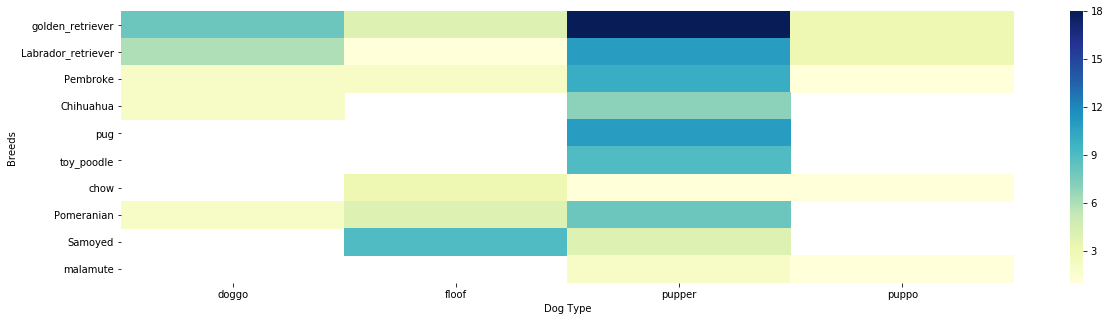

In [87]:
plt.figure(figsize = [20, 5])
subs = df_breed[df_breed.dog_type !='None']
subs = subs.groupby(['breed', 'dog_type']).size()
subs = subs.reset_index(name='count')
subs = subs.pivot(index='breed', columns='dog_type', values='count')
subs.index = pd.CategoricalIndex(subs.index, categories= breed.index)
subs.sort_index(level=0, inplace=True)
sb.heatmap(subs, cmap="YlGnBu");

plt.xlabel('Dog Type');
plt.ylabel('Breeds');
plt.savefig('4.png')

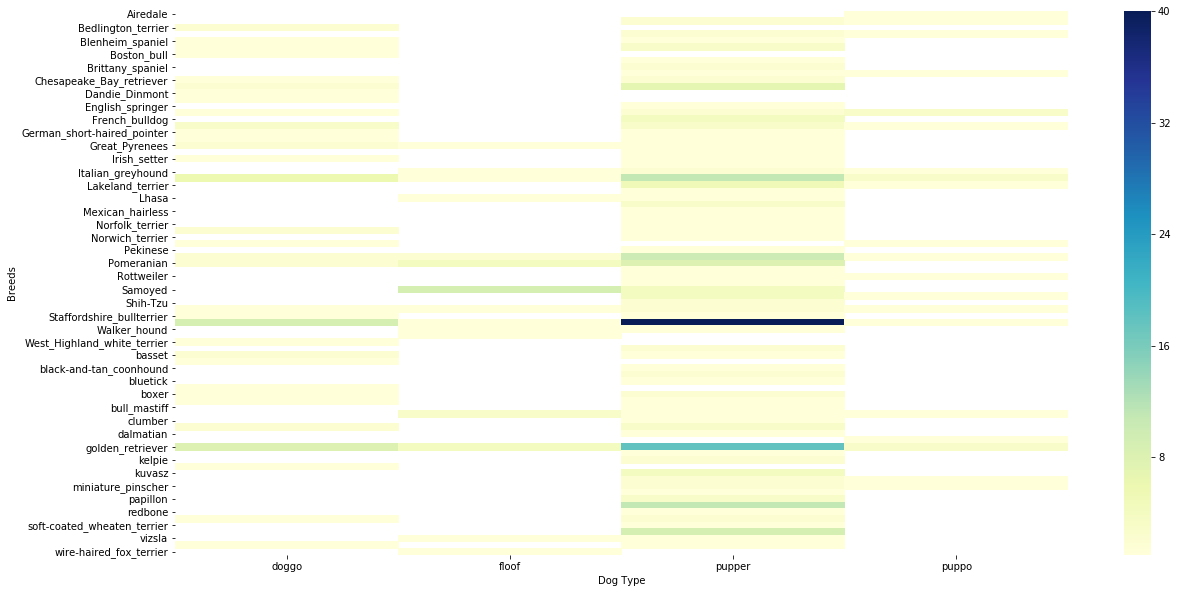

In [88]:
plt.figure(figsize = [20, 10])
subs = df_master[df_master.dog_type !='None']
subs = subs.groupby(['breed', 'dog_type']).size()
subs = subs.reset_index(name='count')
subs = subs.pivot(index='breed', columns='dog_type', values='count')
subs.index = pd.CategoricalIndex(subs.index)
subs.sort_index(level=0, inplace=True)
sb.heatmap(subs, cmap="YlGnBu");

plt.xlabel('Dog Type');
plt.ylabel('Breeds');
plt.savefig('5.png')

> On the heatmap, we can easily compare the count of dog breeds vs dog type. When compared with the top 10 highest counts of dog breeds, the golden retriever as a dog breed and pupper as a dog type have the highest count overall breeds and dog types. However, when compared to all types of breeds and dog types, Staffordshire bullterrier as a dog breed and pupper as a dog type are the highest.